In [5]:
import numpy as np
import pandas as pd

df= pd.read_csv("data.csv")
df.head()

/tmp/ipython-input-2682818755.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data.csv", encoding='latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [6]:
#extracting NO2 column
x =df["no2"].dropna().values
x

array([17.4,  7. , 28.5, ..., 45. , 50. , 46. ])

In [7]:
r =102317237

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

# Transforming each value of x into z
z = x + a_r * np.sin(b_r * x)


In [8]:
# Estimate parameters
mu = np.mean(z)
sigma_sq = np.var(z)

lam = 1 / (2 * sigma_sq)
c = 1 / np.sqrt(2 * np.pi * sigma_sq)

print("Estimated Parameters:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)


Estimated Parameters:
mu = 25.80823999034323
lambda = 0.0014601889029994767
c = 0.0215590482981183


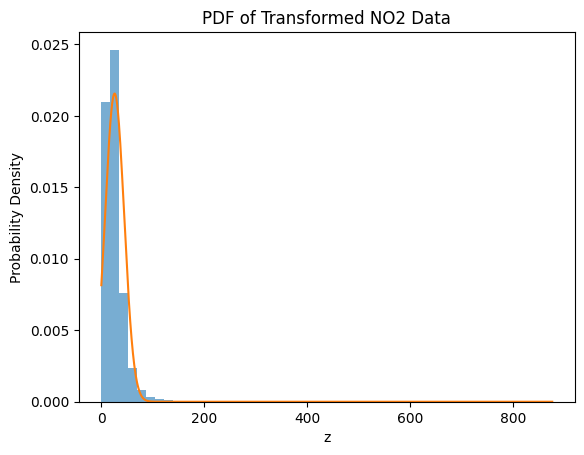

In [10]:
import matplotlib.pyplot as plt

z_vals = np.linspace(min(z), max(z), 1000)
pdf_vals = c * np.exp(-lam * (z_vals - mu) ** 2)

plt.hist(z, bins=50, density=True, alpha=0.6)
plt.plot(z_vals, pdf_vals)

plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("PDF of Transformed NO2 Data")
plt.show()